In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, Dataset
import math
import pickle
import torch
from sklearn.preprocessing import normalize

In [3]:
train_tracks = pickle.load(open('data/all_session_tracks_train.pkl','rb'))
test_tracks = pickle.load(open('data/all_session_tracks_test.pkl','rb'))
train_skips = pickle.load(open('data/all_session_skips_train.pkl','rb'))
test_skips = pickle.load(open('data/all_session_skips_test.pkl','rb'))
track_vocab = pickle.load(open('data/track_vocabs.pkl','rb'))

In [4]:
split_index = int(0.8*len(train_tracks))
train_tracks, valid_tracks, train_skips, valid_skips =  train_tracks[0:split_index],train_tracks[split_index:],\
train_skips[0:split_index],train_skips[split_index:]
test_tracks, test_skips = test_tracks[:10000], test_skips[:10000]
train_tracks, train_skips = train_tracks[:100000], train_skips[:100000]
valid_tracks, valid_skips = valid_tracks[:1000], valid_skips[:1000]

In [5]:
track_embeddings = np.load(open('data/track_embedding.npy','rb')).astype('double')

In [6]:
track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()

In [7]:
track_embeddings

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031, -0.0031, -0.0031],
        ...,
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031, -0.0031, -0.0031],
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031, -0.0031, -0.0031],
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031, -0.0031, -0.0031]],
       dtype=torch.float64)

In [8]:
len(train_tracks), len(test_tracks), len(train_skips), len(test_skips), len(track_vocab), track_embeddings.shape

(100000, 10000, 100000, 10000, 103910, torch.Size([103910, 26]))

## Train Word2vec embeddings

In [218]:
import gensim

In [219]:
docs = []
for tracks,labels in zip(train_tracks,train_skips):
    doc = []
    for track,label in zip(tracks,labels):
        if label == 1:
            doc.append(str(track))
    if len(doc) > 0:
        docs.append(doc)
    

In [220]:
from gensim.models import Word2Vec

In [221]:
model = Word2Vec(sentences=docs, size=100, window=10, min_count=1, workers=8)

In [82]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [86]:
X = model.wv[model.wv.vocab]
X = X[:5000]

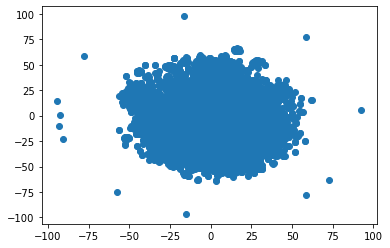

In [87]:

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [223]:
track_embeddings = np.load(open('data/track_embedding.npy','rb')).astype('double')



In [224]:
r,c = track_embeddings.shape
track_embeddings_new = np.zeros((r,c+100)).astype('double')

In [225]:
for i in range(r):
    try:
        track_embeddings_new[i,:c] =  track_embeddings[i]
        track_embeddings_new[i,c:] = model[str(i)]
    except:
        continue
        

<ipython-input-225-0ebec5608160>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  track_embeddings_new[i,c:] = model[str(i)]


In [226]:
track_embeddings_new[3]

array([ 2.55600006e+02,  1.98200000e+03,  9.98926604e+01,  1.50385752e-01,
        7.02139378e-01,  7.04185188e-01,  6.40115798e-01,  9.79656506e+00,
        2.55722582e-01,  1.01361072e+00,  1.45051544e-07,  7.00000000e+00,
        5.21661043e-02, -1.76949997e+01,  5.88657856e-01,  3.97264026e-02,
        8.46669998e+01,  4.00000000e+00,  8.37420762e-01,  7.34024197e-02,
       -1.63914576e-01, -2.19623372e-01, -3.72237824e-02,  6.84699357e-01,
       -2.19794884e-02, -2.66232938e-01,  7.32988771e-03, -7.86207733e-04,
       -1.02029517e-02,  4.70242873e-02,  1.45070814e-02, -7.13560283e-02,
        1.71769112e-02,  3.84193882e-02,  5.02474830e-02,  4.22528014e-02,
        1.14100417e-02, -2.78412383e-02, -9.19252355e-03,  6.33520931e-02,
       -4.67117131e-02,  4.07424271e-02, -4.76609319e-02, -5.18641658e-02,
        3.53294872e-02,  2.35150717e-02,  5.49882241e-02, -5.66939032e-03,
        8.36028084e-02, -2.42765751e-02, -6.53053820e-02, -1.33848796e-02,
        2.01201178e-02,  

In [227]:
np.save('data/track_embeddings_w2v', track_embeddings_new)

In [228]:
track_embeddings = np.load(open('data/track_embeddings_w2v.npy','rb')).astype('double')
track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()

In [229]:
track_embeddings.shape

torch.Size([103910, 126])

In [230]:
track_embeddings[3]

tensor([ 3.1022e-03,  3.1022e-03,  3.1022e-03,  3.1022e-03,  3.1022e-03,
         3.1022e-03,  3.1022e-03,  3.1022e-03,  3.1022e-03,  3.1022e-03,
         3.1022e-03,  3.1022e-03,  3.1022e-03, -3.1022e-03,  3.1022e-03,
         3.1022e-03,  3.1022e-03,  3.1022e-03,  3.1022e-03,  3.1022e-03,
        -3.1022e-03, -3.1022e-03, -3.1022e-03,  3.1022e-03, -3.1022e-03,
        -3.1022e-03,  2.7058e-04, -2.9573e-05, -4.1658e-04,  9.6330e-04,
         3.5781e-04, -9.5962e-04,  4.0126e-04,  7.8329e-04,  1.2530e-03,
         8.9054e-04,  4.7037e-04, -7.9674e-04, -3.2201e-04,  1.2973e-03,
        -8.9846e-04,  1.0141e-03, -9.7301e-04, -1.1064e-03,  9.9643e-04,
         3.8019e-04,  1.0997e-03, -1.7908e-04,  1.2248e-03, -5.4952e-04,
        -1.0260e-03, -3.2037e-04,  4.6941e-04,  2.5603e-04,  4.8005e-04,
         1.7260e-04, -7.2382e-04, -1.0119e-03,  1.1882e-03, -1.2271e-03,
         3.6836e-04,  5.6691e-04,  5.4309e-04, -1.0933e-03,  7.2565e-04,
         1.3069e-03, -1.1817e-03,  4.4540e-05, -1.2

In [231]:
track_embeddings = track_embeddings_new
track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()

## Create Dataset 

In [9]:
track_embeddings.shape

torch.Size([103910, 26])

In [10]:
class DatasetSpotify(Dataset):
    
    def __init__(self, tracks, skips, transform=None):
        self.tracks = tracks
        self.skips = skips
        self.transform = transform
        
    def __len__(self):
        return len(self.tracks)
    
    def __getitem__(self, index):
        features = self.tracks[index]
        label = self.skips[index]
        
#         features_new = []
#         for x,y in zip(features[:10],label[:10]):
#             if y == 1:
#                 features_new.append(x)
#             else:
#                 features_new.append(0)
#         features_new.extend(features[10:])

#         features = features_new

#         return np.array(features[:10]), np.array(features[10:])
    
        return np.array(features), np.array(label)
#         return torch.from_numpy(np.array(features)), torch.from_numpy(np.array(label))
    

In [11]:
train_dataset = DatasetSpotify(train_tracks,train_skips)
valid_dataset = DatasetSpotify(valid_tracks,valid_skips)
test_dataset = DatasetSpotify(test_tracks,test_skips)



In [12]:
BATCH_SIZE = 256 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



In [13]:
train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


In [14]:
next(test_iter)

[tensor([[103302,  51333,  72014,  ...,  74387,  14816, 102419],
         [ 22430,  22430,  56612,  ...,  64317,  23134,  42242],
         [ 59731,  20787, 101918,  ...,  77837,   7383,  83707],
         ...,
         [ 47617,  33642,  20492,  ...,   6768, 102631,  47220],
         [ 42532,  46678,  57173,  ...,  73602,  10058,  28902],
         [ 67462,  91639,  71969,  ...,  52180,  33642,  36692]]),
 tensor([[1, 1, 1,  ..., 1, 1, 1],
         [0, 0, 1,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 1, 0, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 0],
         [0, 1, 1,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 0, 0, 0]])]

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchtext.datasets import Multi30k
from torchtext.data import Field, BucketIterator

import spacy
import numpy as np

import random
import math
import time

In [16]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


## Vanilla Seq2Seq Model Architecture

In [18]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
        self.embedding = nn.Embedding.from_pretrained(track_embeddings)
        
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src):
        
        #src = [src len, batch size]
        
        embedded = self.dropout(self.embedding(src)).float()
        
        
        #embedded = [src len, batch size, emb dim]
        
        outputs, (hidden, cell) = self.rnn(embedded)
        
        #outputs = [src len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #outputs are always from the top hidden layer
        
        return hidden, cell

In [19]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
#         self.embedding = nn.Embedding(output_dim, emb_dim)
        self.embedding = nn.Embedding.from_pretrained(track_embeddings)

        
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, cell):
        
        #input = [batch size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]
        
        input = input.unsqueeze(0)
        
        #input = [1, batch size]
        
        embedded = self.dropout(self.embedding(input)).float()
        
        #embedded = [1, batch size, emb dim]
                
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #seq len and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        prediction = self.fc_out(output.squeeze(0))
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden, cell

In [20]:
import math
class Seq2Seq1(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0):
        
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
      
        
        
        
        split_index = math.floor(src.shape[0]//2)

        seq_to_encode = src[0:split_index,:]
        seq_to_decode = src[split_index:,:]
        targets_of_decoded = trg
        
        
        batch_size = trg.shape[1]
        trg_len = targets_of_decoded.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(seq_to_encode)
        
        #first input to the decoder is the <sos> tokens
        
        

        
        input = trg[split_index-1,:]
        
        for t in range(trg_len):
            
            #insert input token embedding, previous hidden and previous cell states
            #receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input, hidden, cell)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
#             teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = top1
        
        return outputs

In [21]:
BATCH_SIZE=256
INPUT_DIM = len(track_vocab) 
OUTPUT_DIM = 2
# OUTPUT_DIM = len(track_vocab) 

ENC_EMB_DIM = track_embeddings.shape[1]
DEC_EMB_DIM = track_embeddings.shape[1]
HID_DIM = 512
N_LAYERS = 1
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq1(enc, dec, device).to(device)


# print(next(train_iter)[0])

x,y = next(train_iter)
model.forward(x.permute(1,0),y.permute(1,0)).shape

/Users/arorasagar/miniconda3/envs/cs7643-a1/lib/python3.8/site-packages/torch/nn/modules/rnn.py:57: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


torch.Size([20, 256, 2])

In [22]:
# INPUT_DIM = len(tracks_dict) + 1
# OUTPUT_DIM = 2
# ENC_EMB_DIM = 26
# DEC_EMB_DIM = 26
# HID_DIM = 512
# N_LAYERS = 1
# ENC_DROPOUT = 0.2
# DEC_DROPOUT = 0.2

# enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
# dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

# model = Seq2Seq1(enc, dec, device).to(device)

In [23]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)
        
model.apply(init_weights)

Seq2Seq1(
  (encoder): Encoder(
    (embedding): Embedding(103910, 26)
    (rnn): LSTM(26, 512, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(103910, 26)
    (rnn): LSTM(26, 512, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=2, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [24]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,212,866 trainable parameters


In [25]:
optimizer = optim.Adam(model.parameters())


In [26]:
# TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

# criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)
criterion = nn.CrossEntropyLoss()

In [27]:
# train_dataset = DatasetSpotify(train_df)
# valid_dataset = DatasetSpotify(validation_df)
# test_dataset = DatasetSpotify(test_ddf)



# BATCH_SIZE = 256 
# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



# train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


In [28]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    total_maa = 0
    
    for i, (x,y) in enumerate(iterator):
        
        src = x.permute(1,0)
#         print('shape is',src.shape)
        trg = y.permute(1,0)
#         print('shape is',src.shape, trg.shape)

        
        optimizer.zero_grad()
        split_index = math.floor(src.shape[0]//2)

       
        trg = trg[split_index:,:]

        
        output = model(src, trg, 0)
        maa = mean_average_accuracy(output.permute(1,0,2),trg.permute(1,0))

        
#         print('now')
#         print(output.shape, trg.shape)
#         print(output[:,0,:],trg[:,0])
#         print(output[:,1,:],trg[:,1])
#         print(output[:,2,:],trg[:,2])
#         print(output[:,3,:],trg[:,3])
#         break

        
#         if i % 100 == 0:
#             print('Loss',i,epoch_loss)
#             print('mean avg accuracy', mean_average_accuracy(output.permute(1,0,2)[10:],trg.permute(1,0)[10:]))

        
        #trg = [trg len, batch size]
        #output = [trg len, batch size, output dim]
        
        output_dim = output.shape[-1]
#         print('here initial output shape is ',output.shape)
        
        output = output[1:].view(-1, output_dim)
#         print('output shapes are',output.shape, trg.shape)

        trg = trg[1:].reshape(-1)
    
#         print('output is ',output)
#         print('trg is ',trg)

        
        #trg = [(trg len - 1) * batch size]
        #output = [(trg len - 1) * batch size, output dim]
        
        loss = criterion(output, trg)
#         print(maa, loss)
        
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        total_maa += maa

        
    return epoch_loss / len(iterator), total_maa / len(iterator)

In [29]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    total_maa = 0
    total_acc = torch.zeros(10)
    
    with torch.no_grad():
    
        for i, (x,y) in enumerate(iterator):

            src = x.permute(1,0)
            trg = y.permute(1,0)
            split_index = math.floor(src.shape[0]//2)

       
            trg = trg[split_index:,:]

        
            output = model(src, trg, 0)

#             output = model(src, trg, 0) #turn off teacher forcing\
            max_output = torch.argmax(output,dim=2)
            maa = mean_average_accuracy(output.permute(1,0,2),trg.permute(1,0))
            local_acc = accuracy_at_k(output.permute(1,0,2),trg.permute(1,0))
            
#             print(output.shape, max_output.permute(1,0).reshape(-1,20).shape,trg.permute(1,0).reshape(-1,20).shape)
#             if i % 100 == 0:
#                 maa = mean_average_accuracy(output.permute(1,0,2)[10:],trg.permute(1,0)[10:])
#                 print('iter ',i)
# #                 print(max_output[:10][10:])
#                 print('acc is', torch.mean(accuracy(max_output.permute(1,0).reshape(-1,20),trg.permute(1,0).reshape(-1,20))))
#                 print('mean avg accuracy', maa)



            #trg = [trg len, batch size]
            #output = [trg len, batch size, output dim]

            output_dim = output.shape[-1]
            
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].reshape(-1)

            #trg = [(trg len - 1) * batch size]
            #output = [(trg len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            
            epoch_loss += loss.item()
            total_maa += maa
            total_acc += local_acc
            
        
    return epoch_loss / len(iterator), total_maa / len(iterator) , total_acc/len(iterator)

In [30]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [31]:
def accuracy(output, target):
    
    """Computes the accuracy of the predicted skip sequence"""
    
    seq_len = target.shape[1]
    correct = output.eq(target)
    correct = correct.sum(axis=1) * 1.0
    acc = correct / seq_len
    return acc
def mean_average_accuracy(output, target):
    
    """Computes the  mean average accuracy of the predicted skip sequence up till the 10th seq position"""
    output = output.to(device)
    target = target.to(device)
    T = output.shape[1]
    batch_size = target.shape[0]
    output = torch.argmax(output, dim=2)
    A_i = torch.zeros(batch_size, T)
    L_i = torch.zeros(batch_size, T)
#     print('T ',T)
#     print(output[:10,0:])
#     print(target[:10,0:])

    for i in range(1,T+1):
        
        A_i[:,i-1] = accuracy(output[:,0:i], target[:,0:i])
        pred_i = output[:,i-1]
        target_i = target[:,i-1]
        L_i[:,i-1] = pred_i.eq(target_i)*1.0
        A_i[:,i-1] = A_i[:,i-1]*L_i[:,i-1]
    AA = A_i.sum(dim =1) / T
    return torch.sum(AA) / batch_size
def accuracy_at_k(output, target):
    
    """Computes the  mean average accuracy of the predicted skip sequence up till the 10th seq position"""
    output = output.to(device)
    target = target.to(device)
#     print(output.shape)    
#     print(target.shape)


    
    T = output.shape[1]
#     print(T)
    batch_size = target.shape[0]
    output = torch.argmax(output, dim=2)
    A_i = torch.zeros(batch_size, T)
    L_i = torch.zeros(batch_size, T)
#     print('T ',T)
#     print(output[:10,0:])
#     print(target[:10,0:])
    acc = torch.zeros(T)

    for i in range(T):
#         print(output[:,i].shape)
        
        acc[i] = torch.mean(accuracy(output[:,i].reshape(batch_size,1), target[:,i].reshape(batch_size,1)))
        
    return acc

In [356]:
N_EPOCHS = 5
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

    
    start_time = time.time()
    
    train_loss, train_maa =  train(model, train_iter, optimizer, criterion, CLIP)
    valid_loss, valid_maa, _ = evaluate(model, valid_iter, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'vanilla.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f} | Train MAA: {train_maa:7.3f}' )
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f} | Valid MAA: {valid_maa:7.3f}')

Epoch: 01 | Time: 2m 15s
	Train Loss: 0.564 | Train PPL:   1.758 | Train MAA:   0.518
	 Val. Loss: 0.562 |  Val. PPL:   1.754 | Valid MAA:   0.522
Epoch: 02 | Time: 2m 15s
	Train Loss: 0.563 | Train PPL:   1.756 | Train MAA:   0.519
	 Val. Loss: 0.562 |  Val. PPL:   1.754 | Valid MAA:   0.522
Epoch: 03 | Time: 2m 30s
	Train Loss: 0.563 | Train PPL:   1.755 | Train MAA:   0.520
	 Val. Loss: 0.562 |  Val. PPL:   1.754 | Valid MAA:   0.522
Epoch: 04 | Time: 2m 57s
	Train Loss: 0.562 | Train PPL:   1.755 | Train MAA:   0.520
	 Val. Loss: 0.562 |  Val. PPL:   1.754 | Valid MAA:   0.522
Epoch: 05 | Time: 3m 17s
	Train Loss: 0.562 | Train PPL:   1.755 | Train MAA:   0.520
	 Val. Loss: 0.562 |  Val. PPL:   1.753 | Valid MAA:   0.522


In [357]:
BATCH_SIZE = 100000 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla.pt'))

test_loss, test_maa, test_acc = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('test acc, ', test_acc)

| Test Loss: 0.563 | Test PPL:   1.755 | Test MAA:   0.521
test acc,  tensor([0.5720, 0.6030, 0.6092, 0.6222, 0.6309, 0.6443, 0.6594, 0.6922, 0.7594,
        1.0000])


## Change Dataset to modify skipped track with skip token

In [380]:
class DatasetSpotify(Dataset):
    
    def __init__(self, tracks, skips, transform=None):
        self.tracks = tracks
        self.skips = skips
        self.transform = transform
        
    def __len__(self):
        return len(self.tracks)
    
    def __getitem__(self, index):
        features = self.tracks[index]
        label = self.skips[index]
        
        features_new = []
        for x,y in zip(features[:10],label[:10]):
            if y == 1:
                features_new.append(x)
            else:
                features_new.append(0)
        features_new.extend(features[10:])

        features = features_new

#         return np.array(features[:10]), np.array(features[10:])
    
        return np.array(features), np.array(label)
#         return torch.from_numpy(np.array(features)), torch.from_numpy(np.array(label))
    

train_dataset = DatasetSpotify(train_tracks,train_skips)
valid_dataset = DatasetSpotify(valid_tracks,valid_skips)
test_dataset = DatasetSpotify(test_tracks,test_skips)



BATCH_SIZE = 256 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


In [381]:
next(iter(train_iter))

[tensor([[ 75651,      0,      0,  ...,  78207,  67988,  67988],
         [     0,      0,      0,  ...,  66049, 102212, 101661],
         [ 50497,  67863,  77965,  ...,  40205,  69471,  67987],
         ...,
         [     0,      0,      0,  ...,  67462,  12808,  52543],
         [ 43011,    379,   6921,  ..., 103405,  90487,  16457],
         [ 28669,      0,      0,  ...,  52209,  32783,  75824]]),
 tensor([[1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 1, 1],
         [1, 1, 1,  ..., 1, 1, 0],
         [1, 0, 0,  ..., 1, 1, 0]])]

In [360]:
N_EPOCHS = 5
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

    
    start_time = time.time()
    
    train_loss, train_maa =  train(model, train_iter, optimizer, criterion, CLIP)
    valid_loss, valid_maa, _ = evaluate(model, valid_iter, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'vanilla-skip.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f} | Train MAA: {train_maa:7.3f}' )
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f} | Valid MAA: {valid_maa:7.3f}')

Epoch: 01 | Time: 2m 52s
	Train Loss: 0.536 | Train PPL:   1.709 | Train MAA:   0.592
	 Val. Loss: 0.527 |  Val. PPL:   1.694 | Valid MAA:   0.608
Epoch: 02 | Time: 2m 54s
	Train Loss: 0.528 | Train PPL:   1.696 | Train MAA:   0.606
	 Val. Loss: 0.525 |  Val. PPL:   1.690 | Valid MAA:   0.611
Epoch: 03 | Time: 2m 48s
	Train Loss: 0.528 | Train PPL:   1.695 | Train MAA:   0.606
	 Val. Loss: 0.525 |  Val. PPL:   1.691 | Valid MAA:   0.608
Epoch: 04 | Time: 2m 32s
	Train Loss: 0.528 | Train PPL:   1.695 | Train MAA:   0.606
	 Val. Loss: 0.525 |  Val. PPL:   1.691 | Valid MAA:   0.609
Epoch: 05 | Time: 2m 24s
	Train Loss: 0.527 | Train PPL:   1.694 | Train MAA:   0.605
	 Val. Loss: 0.526 |  Val. PPL:   1.691 | Valid MAA:   0.606


In [361]:
BATCH_SIZE = 100000 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla-skip.pt'))

test_loss, test_maa, test_acc = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('test acc',test_acc)

| Test Loss: 0.526 | Test PPL:   1.693 | Test MAA:   0.611
test acc tensor([0.7491, 0.7141, 0.6937, 0.6869, 0.6815, 0.6797, 0.6786, 0.6946, 0.7594,
        1.0000])


## Word2vec embeddings

In [42]:
track_embeddings = np.load(open('data/track_embeddings_w2v.npy','rb')).astype('double')
track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()
# track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()

In [43]:
track_embeddings.shape

torch.Size([103910, 126])

In [44]:
class DatasetSpotify(Dataset):
    
    def __init__(self, tracks, skips, transform=None):
        self.tracks = tracks
        self.skips = skips
        self.transform = transform
        
    def __len__(self):
        return len(self.tracks)
    
    def __getitem__(self, index):
        features = self.tracks[index]
        label = self.skips[index]
        
        features_new = []
        for x,y in zip(features[:10],label[:10]):
            if y == 1:
                features_new.append(x)
            else:
                features_new.append(0)
        features_new.extend(features[10:])

        features = features_new

#         return np.array(features[:10]), np.array(features[10:])
    
        return np.array(features), np.array(label)
#         return torch.from_numpy(np.array(features)), torch.from_numpy(np.array(label))
    

train_dataset = DatasetSpotify(train_tracks,train_skips)
valid_dataset = DatasetSpotify(valid_tracks,valid_skips)
test_dataset = DatasetSpotify(test_tracks,test_skips)



BATCH_SIZE = 256 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


In [45]:
INPUT_DIM = len(track_vocab) 
OUTPUT_DIM = 2
# OUTPUT_DIM = len(track_vocab) 

ENC_EMB_DIM = track_embeddings.shape[1]
DEC_EMB_DIM = track_embeddings.shape[1]
HID_DIM = 512
N_LAYERS = 1
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq1(enc, dec, device).to(device)
model.apply(init_weights)

# print(next(train_iter)[0])

# x,y = next(train_iter)
# model.forward(x.permute(1,0),y.permute(1,0)).shape

        


/Users/arorasagar/miniconda3/envs/cs7643-a1/lib/python3.8/site-packages/torch/nn/modules/rnn.py:57: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Seq2Seq1(
  (encoder): Encoder(
    (embedding): Embedding(103910, 126)
    (rnn): GRU(126, 512, dropout=0.5, bidirectional=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(103910, 126)
    (rnn): GRU(126, 512, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=2, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [366]:
N_EPOCHS = 5
CLIP = 1

best_valid_loss = float('inf')
optimizer = optim.Adam(model.parameters())


for epoch in range(N_EPOCHS):
    train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

    
    start_time = time.time()
    
    train_loss, train_maa =  train(model, train_iter, optimizer, criterion, CLIP)
    valid_loss, valid_maa, acc_at_k = evaluate(model, valid_iter, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'vanilla-w2v.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f} | Train MAA: {train_maa:7.3f}' )
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f} | Valid MAA: {valid_maa:7.3f}')

Epoch: 01 | Time: 2m 20s
	Train Loss: 0.548 | Train PPL:   1.730 | Train MAA:   0.602
	 Val. Loss: 0.526 |  Val. PPL:   1.693 | Valid MAA:   0.611
Epoch: 02 | Time: 2m 47s
	Train Loss: 0.527 | Train PPL:   1.694 | Train MAA:   0.610
	 Val. Loss: 0.524 |  Val. PPL:   1.688 | Valid MAA:   0.613
Epoch: 03 | Time: 2m 51s
	Train Loss: 0.525 | Train PPL:   1.691 | Train MAA:   0.612
	 Val. Loss: 0.523 |  Val. PPL:   1.686 | Valid MAA:   0.614
Epoch: 04 | Time: 2m 55s
	Train Loss: 0.524 | Train PPL:   1.689 | Train MAA:   0.612
	 Val. Loss: 0.524 |  Val. PPL:   1.688 | Valid MAA:   0.610
Epoch: 05 | Time: 3m 27s
	Train Loss: 0.522 | Train PPL:   1.686 | Train MAA:   0.613
	 Val. Loss: 0.521 |  Val. PPL:   1.683 | Valid MAA:   0.614


In [367]:
BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla-w2v.pt'))

test_loss, test_maa, acc_at_k = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('acc at k',acc_at_k)

| Test Loss: 0.524 | Test PPL:   1.689 | Test MAA:   0.612
acc at k tensor([0.7561, 0.7153, 0.6945, 0.6881, 0.6813, 0.6775, 0.6776, 0.6975, 0.7594,
        1.0000])


## Bidirectional GRU 

In [46]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
        self.embedding = nn.Embedding.from_pretrained(track_embeddings)
        
        self.rnn = nn.GRU(emb_dim, hid_dim, n_layers, dropout = dropout, bidirectional=True)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src):
        
        #src = [src len, batch size]
        
        embedded = self.dropout(self.embedding(src)).float()
        
        
        #embedded = [src len, batch size, emb dim]
        
        outputs, hidden = self.rnn(embedded)
        
        #outputs = [src len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #outputs are always from the top hidden layer
        
        a,b,c = hidden.shape
        
        return hidden[-1,:,:].view(1,b,c)

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
#         self.embedding = nn.Embedding(output_dim, emb_dim)
        self.embedding = nn.Embedding.from_pretrained(track_embeddings)

        
        self.rnn = nn.GRU(emb_dim, hid_dim, n_layers, dropout = dropout, bidirectional=False)
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden):
        
        #input = [batch size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]
        
        input = input.unsqueeze(0)
        
        #input = [1, batch size]
        
        embedded = self.dropout(self.embedding(input)).float()
        
        #embedded = [1, batch size, emb dim]
                
        output, hidden = self.rnn(embedded, hidden)
        
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #seq len and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        prediction = self.fc_out(output.squeeze(0))
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden

class Seq2Seq1(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0):
        
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
      
        
        
        
        split_index = math.floor(src.shape[0]//2)

        seq_to_encode = src[0:split_index,:]
        seq_to_decode = src[split_index:,:]
        targets_of_decoded = trg
        
        
        batch_size = trg.shape[1]
        trg_len = targets_of_decoded.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden = self.encoder(seq_to_encode)
        
        #first input to the decoder is the <sos> tokens
        
        

        
        input = trg[split_index-1,:]
        
        for t in range(trg_len):
            
            #insert input token embedding, previous hidden and previous cell states
            #receive output tensor (predictions) and new hidden and cell states
            output, hidden = self.decoder(input, hidden)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
#             teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = top1
        
        return outputs

In [47]:

train_dataset = DatasetSpotify(train_tracks,train_skips)
valid_dataset = DatasetSpotify(valid_tracks,valid_skips)
test_dataset = DatasetSpotify(test_tracks,test_skips)



BATCH_SIZE = 256 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


INPUT_DIM = len(track_vocab) 
OUTPUT_DIM = 2
# OUTPUT_DIM = len(track_vocab) 

ENC_EMB_DIM = track_embeddings.shape[1]
DEC_EMB_DIM = track_embeddings.shape[1]
HID_DIM = 512
N_LAYERS = 1
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq1(enc, dec, device).to(device)
model.apply(init_weights)

# print(next(train_iter)[0])

x,y = next(train_iter)
model.forward(x.permute(1,0),y.permute(1,0)).shape

        


torch.Size([20, 256, 2])

In [370]:
N_EPOCHS = 5
CLIP = 1

best_valid_loss = float('inf')
optimizer = optim.Adam(model.parameters())


for epoch in range(N_EPOCHS):
    train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

    
    start_time = time.time()
    
    train_loss, train_maa =  train(model, train_iter, optimizer, criterion, CLIP)
    valid_loss, valid_maa, _ = evaluate(model, valid_iter, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'vanilla-w2v-gru1.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f} | Train MAA: {train_maa:7.3f}' )
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f} | Valid MAA: {valid_maa:7.3f}')

BATCH_SIZE = 100000 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla-w2v-GRU1.pt'))

test_loss, test_maa, acc_at_k = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('acc at k',acc_at_k)

Epoch: 01 | Time: 3m 11s
	Train Loss: 0.548 | Train PPL:   1.730 | Train MAA:   0.595
	 Val. Loss: 0.527 |  Val. PPL:   1.693 | Valid MAA:   0.607
Epoch: 02 | Time: 3m 31s
	Train Loss: 0.527 | Train PPL:   1.694 | Train MAA:   0.606
	 Val. Loss: 0.525 |  Val. PPL:   1.690 | Valid MAA:   0.610
Epoch: 03 | Time: 3m 26s
	Train Loss: 0.525 | Train PPL:   1.690 | Train MAA:   0.611
	 Val. Loss: 0.524 |  Val. PPL:   1.689 | Valid MAA:   0.611
Epoch: 04 | Time: 3m 26s
	Train Loss: 0.524 | Train PPL:   1.688 | Train MAA:   0.612
	 Val. Loss: 0.522 |  Val. PPL:   1.686 | Valid MAA:   0.615
Epoch: 05 | Time: 3m 40s
	Train Loss: 0.522 | Train PPL:   1.686 | Train MAA:   0.613
	 Val. Loss: 0.520 |  Val. PPL:   1.682 | Valid MAA:   0.615
| Test Loss: 0.523 | Test PPL:   1.688 | Test MAA:   0.613
acc at k tensor([0.7617, 0.7158, 0.6936, 0.6875, 0.6811, 0.6792, 0.6795, 0.6966, 0.7561,
        1.0000])


In [48]:
track_embeddings = np.load(open('data/track_embeddings_w2v.npy','rb')).astype('double')
track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()

In [290]:
BATCH_SIZE = 100000
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla-w2v-GRU1.pt'))

test_loss, test_maa, test_acc = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('Test acc at k ',test_acc)

| Test Loss: 0.630 | Test PPL:   1.878 | Test MAA:   0.565
Test acc at k  tensor([0.7206, 0.6961, 0.6793, 0.6708, 0.6610, 0.6551, 0.6494, 0.6397, 0.6358,
        0.6296])


## sequence prediction task

In [32]:
track_embeddings = np.load(open('data/track_embedding.npy','rb')).astype('double')

track_embeddings = torch.from_numpy(normalize(track_embeddings,axis=0)).double()

In [33]:
track_embeddings.shape

torch.Size([103910, 26])

In [34]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
        self.embedding = nn.Embedding.from_pretrained(track_embeddings)
        
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src):
        
        #src = [src len, batch size]
        
        embedded = self.dropout(self.embedding(src)).float()
        
        
        #embedded = [src len, batch size, emb dim]
        
        outputs, (hidden, cell) = self.rnn(embedded)
        
        #outputs = [src len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #outputs are always from the top hidden layer
        
        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
#         self.embedding = nn.Embedding(output_dim, emb_dim)
        self.embedding = nn.Embedding.from_pretrained(track_embeddings)

        
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, cell):
        
        #input = [batch size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]
        
        input = input.unsqueeze(0)
        
        #input = [1, batch size]
        
        embedded = self.dropout(self.embedding(input)).float()
        
        #embedded = [1, batch size, emb dim]
                
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        
        #seq len and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        prediction = self.fc_out(output.squeeze(0))
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden, cell

import math
class Seq2Seq1(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0):
        
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
      
        
        
        
        split_index = math.floor(src.shape[0]//2)

        seq_to_encode = src[0:split_index,:]
        seq_to_decode = src[split_index:,:]
        targets_of_decoded = trg
        
        
        batch_size = trg.shape[1]
        trg_len = targets_of_decoded.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(seq_to_encode)
        
        #first input to the decoder is the <sos> tokens
        
        

        
        input = trg[split_index-1,:]
        
        for t in range(trg_len):
            
            #insert input token embedding, previous hidden and previous cell states
            #receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input, hidden, cell)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
#             teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = top1
            if teacher_forcing_ratio == 1:
                input =  trg[t,:]

        
        return outputs

In [35]:
class DatasetSpotify(Dataset):
    
    def __init__(self, tracks, skips, transform=None):
        self.tracks = tracks
        self.skips = skips
        self.transform = transform
        
    def __len__(self):
        return len(self.tracks)
    
    def __getitem__(self, index):
        features = self.tracks[index]
        label = self.skips[index]
        
        features_new = []
        for x,y in zip(features[:10],label[:10]):
            if y == 1:
                features_new.append(x)
            else:
                features_new.append(0)
        features_new.extend(features[10:])

        features = features_new

        return np.array(features), np.array(features)
    
        return np.array(features), np.array(label)
#         return torch.from_numpy(np.array(features)), torch.from_numpy(np.array(label))
    

train_dataset = DatasetSpotify(train_tracks,train_skips)
valid_dataset = DatasetSpotify(valid_tracks,valid_skips)
test_dataset = DatasetSpotify(test_tracks,test_skips)



BATCH_SIZE = 256 
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


In [36]:

train_dataset = DatasetSpotify(train_tracks,train_skips)
valid_dataset = DatasetSpotify(valid_tracks,valid_skips)
test_dataset = DatasetSpotify(test_tracks,test_skips)



BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)


INPUT_DIM = len(track_vocab) 
OUTPUT_DIM = 2
OUTPUT_DIM = len(track_vocab) 

ENC_EMB_DIM = track_embeddings.shape[1]
DEC_EMB_DIM = track_embeddings.shape[1]
HID_DIM = 512
N_LAYERS = 1
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq1(enc, dec, device).to(device)
model.apply(init_weights)

# print(next(train_iter)[0])

x,y = next(train_iter)
# model.forward(x.permute(1,0),y.permute(1,0),1).shape

        


/Users/arorasagar/miniconda3/envs/cs7643-a1/lib/python3.8/site-packages/torch/nn/modules/rnn.py:57: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [37]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    total_maa = 0
    
    for i, (x,y) in enumerate(iterator):
        
        src = x.permute(1,0)
#         print('shape is',src.shape)
        trg = y.permute(1,0)
#         print('shape is',src.shape, trg.shape)

        
        optimizer.zero_grad()
        split_index = math.floor(src.shape[0]//2)

       
        trg = trg[split_index:,:]

        
        output = model(src, trg, 1)
#         print('....',output.shape, src.shape, trg.shape)

#         print('....',output.permute(1,0,2).shape)
        maa = mean_average_accuracy(output.permute(1,0,2),trg.permute(1,0))
        if i % 10 == 0:
            print( i, epoch_loss / (i+1), total_maa / (i+1))


        
#         print('now')
#         print(output.shape, trg.shape)
#         print(output[:,0,:],trg[:,0])
#         print(output[:,1,:],trg[:,1])
#         print(output[:,2,:],trg[:,2])
#         print(output[:,3,:],trg[:,3])
#         break
        

        
#         if i % 100 == 0:
#             print('Loss',i,epoch_loss)
#             print('mean avg accuracy', mean_average_accuracy(output.permute(1,0,2)[10:],trg.permute(1,0)[10:]))

        
        #trg = [trg len, batch size]
        #output = [trg len, batch size, output dim]
        
        output_dim = output.shape[-1]
#         print('here initial output shape is ',output.shape)
        
        output = output[1:].view(-1, output_dim)
#         print('output shapes are',output.shape, trg.shape)

        trg = trg[1:].reshape(-1)
    
#         print('output is ',output)
#         print('trg is ',trg)

        
        #trg = [(trg len - 1) * batch size]
        #output = [(trg len - 1) * batch size, output dim]
        
        loss = criterion(output, trg)
#         print(maa, loss)
        
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        total_maa += maa

        
    return epoch_loss / len(iterator), total_maa / len(iterator)

# def evaluate(model, iterator, criterion):
    
#     model.eval()
    
#     epoch_loss = 0
#     total_maa = 0
    
#     with torch.no_grad():
    
#         for i, (x,y) in enumerate(iterator):


#             src = x.permute(1,0)
#             trg = y.permute(1,0)
#             split_index = math.floor(src.shape[0]//2)

#             trg = trg[split_index:,:]

            

#             output = model(src, trg, 0) #turn off teacher forcing\
#             max_output = torch.argmax(output,dim=2)
#             maa = mean_average_accuracy(output.permute(1,0,2),trg.permute(1,0))
            




#             #trg = [trg len, batch size]
#             #output = [trg len, batch size, output dim]

#             output_dim = output.shape[-1]
            
#             output = output[1:].view(-1, output_dim)
#             trg = trg[1:].reshape(-1)

#             #trg = [(trg len - 1) * batch size]
#             #output = [(trg len - 1) * batch size, output dim]

#             loss = criterion(output, trg)
            
#             epoch_loss += loss.item()
#             total_maa += maa
        
#     return epoch_loss / len(iterator), total_maa / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs



In [ ]:

model.load_state_dict(torch.load('vanilla-sequence.pt'))

N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')
optimizer = optim.Adam(model.parameters())


for epoch in range(N_EPOCHS):
    train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

    
    start_time = time.time()
    
    train_loss, train_maa =  train(model, train_iter, optimizer, criterion, CLIP)
    valid_loss, valid_maa, _ = evaluate(model, valid_iter, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'vanilla-sequence.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f} | Train MAA: {train_maa:7.3f}' )
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f} | Valid MAA: {valid_maa:7.3f}')

BATCH_SIZE = 10000
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla-sequence.pt'))

test_loss, test_maa, acc_at_k = evaluate(model, test_iter, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('acc at k', acc_at_k)

0 0.0 0.0
10 7.577510833740234 tensor(0.0354)
20 7.906418209984189 tensor(0.0358)
30 8.016829183024745 tensor(0.0364)
40 8.067983371455496 tensor(0.0380)
50 8.082865621529374 tensor(0.0397)
60 8.116044200834681 tensor(0.0403)
70 8.139649820999361 tensor(0.0406)
80 8.158368004692925 tensor(0.0407)
90 8.165168830326625 tensor(0.0412)
100 8.16097086254913 tensor(0.0419)
110 8.171688608221105 tensor(0.0421)
120 8.173308348852741 tensor(0.0424)
130 8.171818292777957 tensor(0.0429)
140 8.175747090197625 tensor(0.0432)
150 8.174734510333332 tensor(0.0435)
160 8.175497262374215 tensor(0.0435)
170 8.175672458626373 tensor(0.0436)
180 8.170389560046116 tensor(0.0439)
190 8.169779917332514 tensor(0.0441)
200 8.16382630666097 tensor(0.0445)
210 8.161162760585405 tensor(0.0448)
220 8.15874141158022 tensor(0.0450)
230 8.157646682871368 tensor(0.0452)
240 8.156693589143238 tensor(0.0454)
250 8.15181381483952 tensor(0.0457)
260 8.150057376116171 tensor(0.0460)
270 8.148340698537792 tensor(0.0462)
280 

In [38]:
BATCH_SIZE = 1000
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_iter, valid_iter, test_iter = iter(train_loader),iter(valid_loader),iter(test_loader)

model.load_state_dict(torch.load('vanilla-sequence.pt'))

test_loss, test_maa, acc_at_k = evaluate(model, test_iter, criterion)



print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} | Test MAA: {test_maa:7.3f}')
print('acc at k', acc_at_k)

| Test Loss: 11.905 | Test PPL: 147955.750 | Test MAA:   0.006
acc at k tensor([0.0085, 0.0099, 0.0067, 0.0077, 0.0066, 0.0077, 0.0055, 0.0065, 0.0054,
        0.0055])
